## Healthcare
### Description

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 

#### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

#### Variables Description:
- Pregnancies	Number of times pregnant
- Glucose	Plasma glucose concentration in an oral glucose tolerance test
- BloodPressure	Diastolic blood pressure (mm Hg)
- SkinThickness	Triceps skinfold thickness (mm)
- Insulin	Two hour serum insulin
- BMI	Body Mass Index
- DiabetesPedigreeFunction	Diabetes pedigree function
- Age	Age in years
- Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### Project Task: Week 1

##### Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose, BloodPressure, SkinThickness, Insulin and BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 
##### Data Exploration:

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Perform correlation analysis. Visually explore it using a heat map.


### Project Task: Week 2

##### Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

 

##### Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

# Task Week 1:

#### Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('health care diabetes.csv')

In [86]:
df.shape

(768, 9)

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


According to the problem statement, a value of zero in below columns indicates missing value: 
- Glucose

- BloodPressure

- SkinThickness

- Insulin

- BMI

We will replace zeroes in these columns with null values


In [89]:
# Replace 'column1', 'column2', and 'column3' with your actual column names
columns_to_replace_with_null_as_zero = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']
# Replace 0 with NaN in the specified columns
df[columns_to_replace_with_null_as_zero] = df[columns_to_replace_with_null_as_zero].replace(0, pd.NA)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             733 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


In [91]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [92]:
df.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958
std,3.369578,0.331329,11.760232,0.476951
min,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.243750,24.000000,0.000000
50%,3.000000,0.372500,29.000000,0.000000
75%,6.000000,0.626250,41.000000,1.000000
max,17.000000,2.420000,81.000000,1.000000


In [93]:
# Replace 'column1', 'column2', and 'column3' with your actual column names
columns_to_explore = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

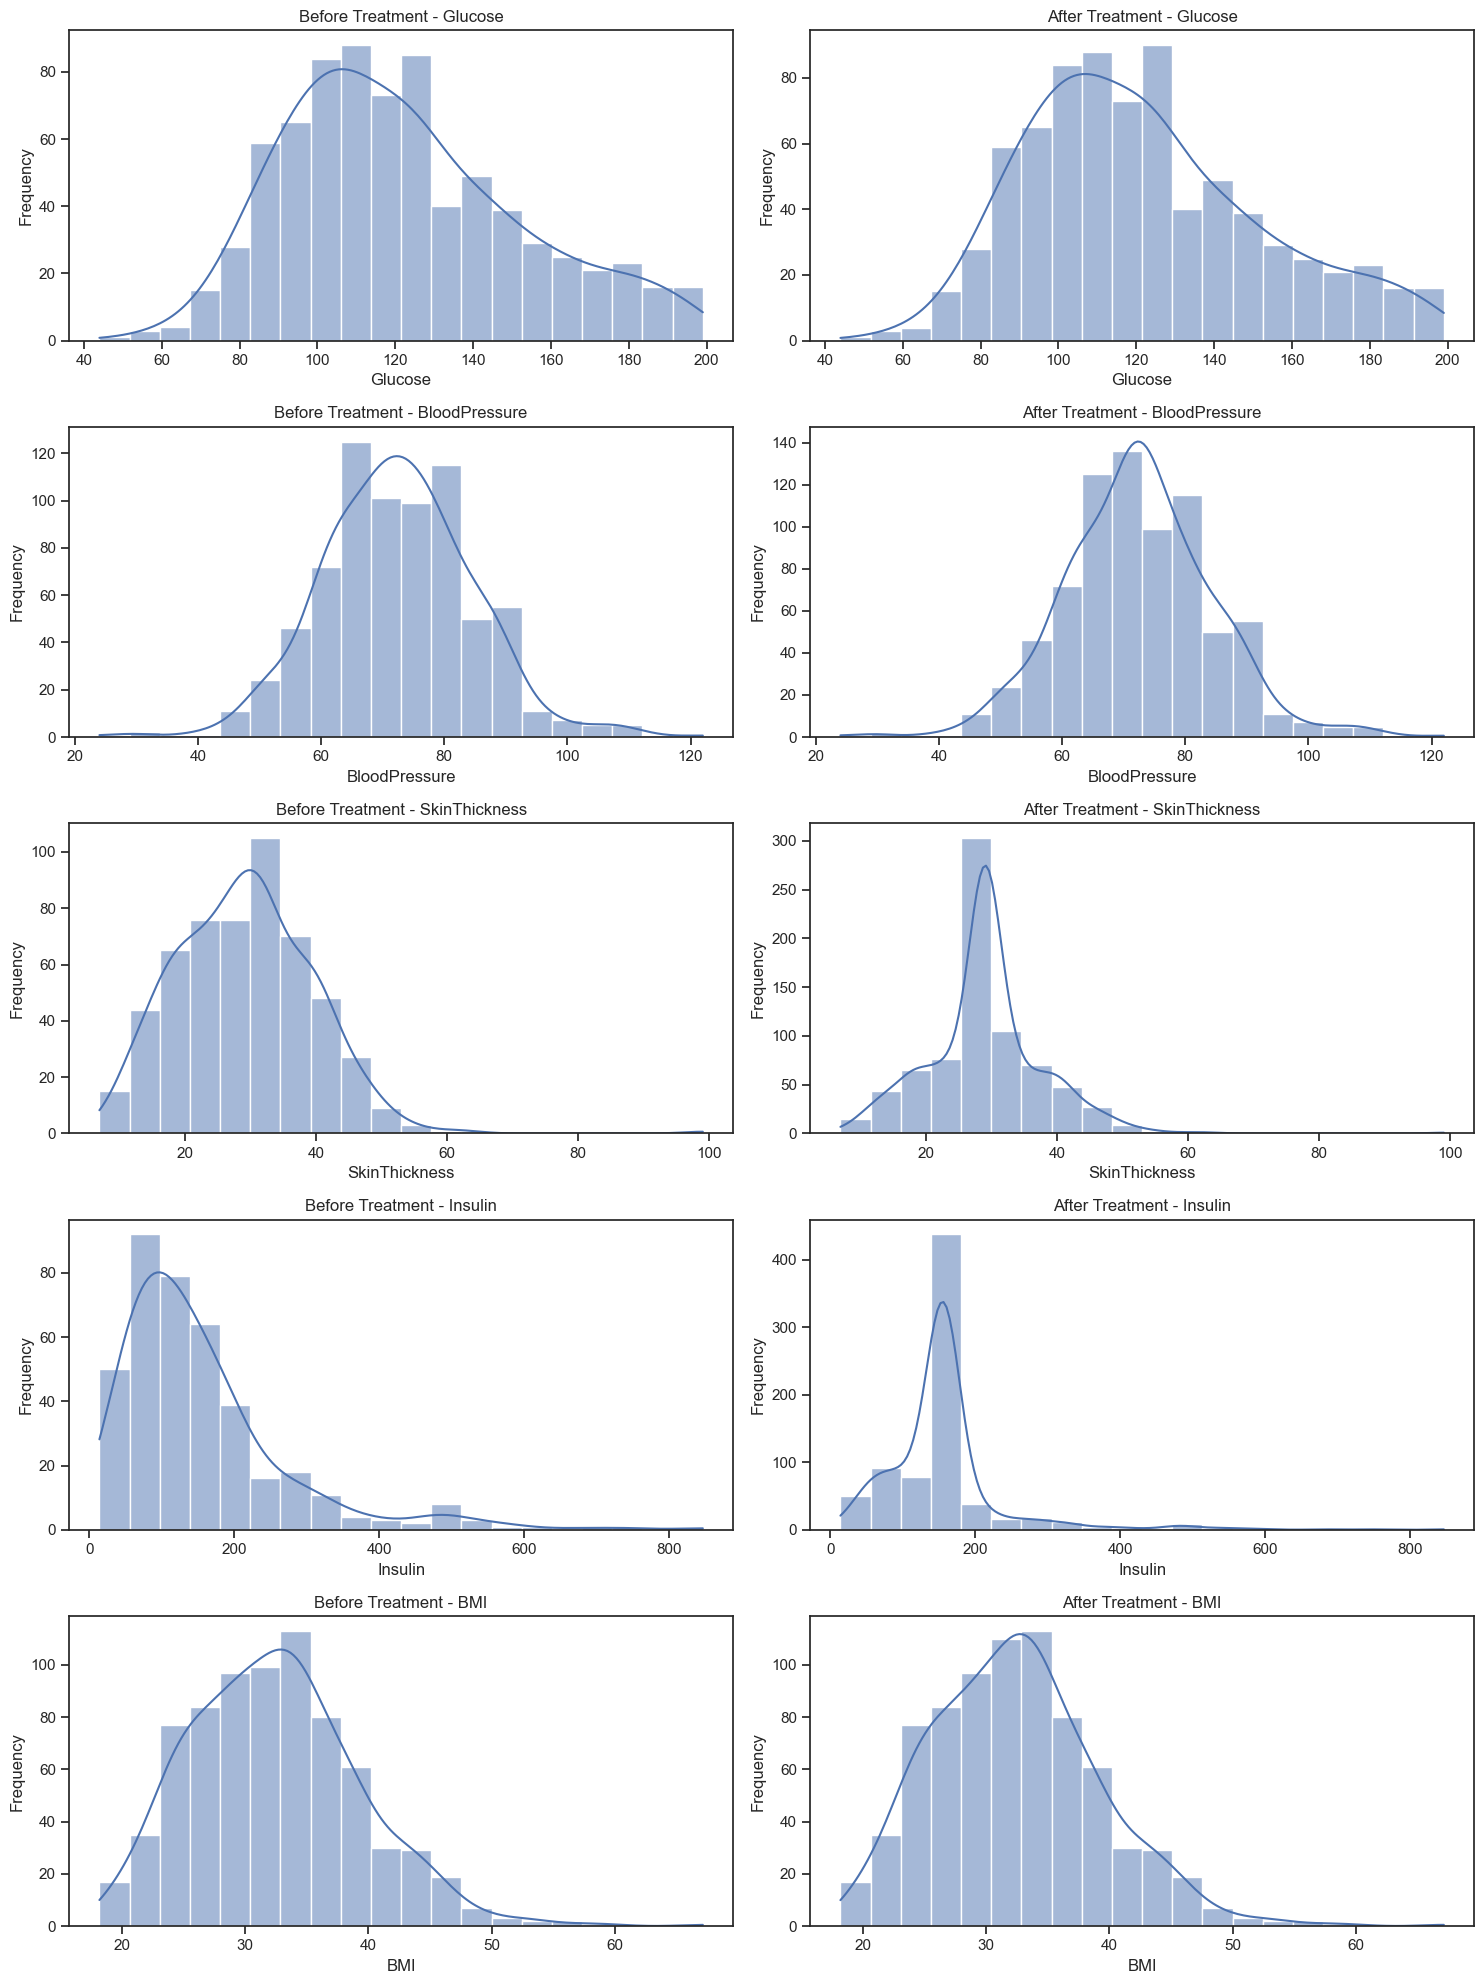

In [94]:
# Create subplots for each column before and after handling missing values
fig, axes = plt.subplots(nrows=len(columns_to_explore), ncols=2, figsize=(15, 4 * len(columns_to_explore)))
# Set the color palette to 'viridis'
sns.set_palette('viridis')
# Define replacement strategies for each column
replacement_strategies = {'Glucose': 'mean', 'BloodPressure': 'mean', 'SkinThickness': 'median', 'Insulin': 'mean', 'BMI': 'mean'}
# Plot histograms before and after handling missing values
for i, column in enumerate(columns_to_explore):
    # Plot before treatment
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Treatment - {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Replace null values with the specified strategy
    strategy = replacement_strategies.get(column, 'mean')
    if strategy == 'median':
        replacement_value = df[column].median()
    else:
        replacement_value = df[column].mean()

    df[column] = df[column].fillna(replacement_value)

    # Plot after treatment
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Treatment - {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')
    


plt.tight_layout()
plt.show()

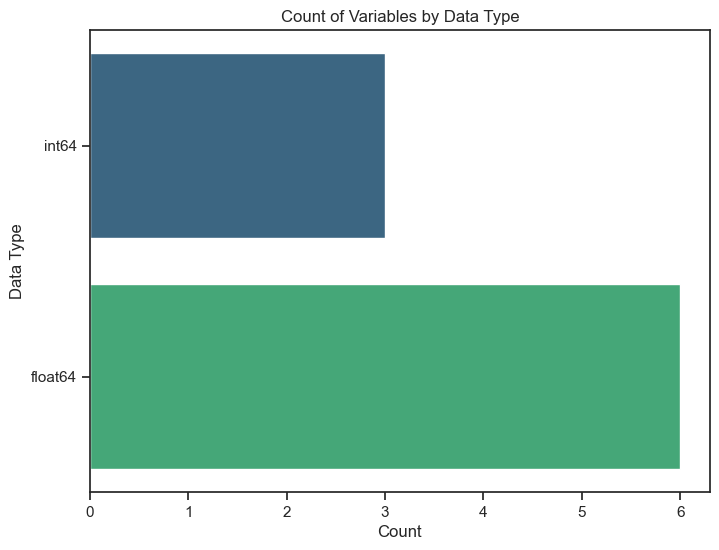

In [95]:
data_types_counts = df.dtypes.value_counts()

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(y=df.dtypes, palette="viridis")
plt.title("Count of Variables by Data Type")
plt.xlabel("Count")
plt.ylabel("Data Type")
plt.show()

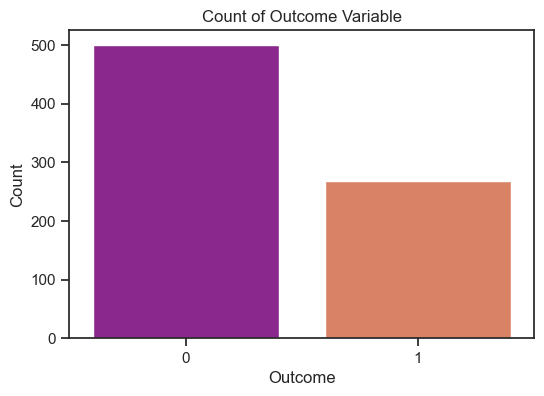

In [96]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette="plasma")
plt.title("Count of Outcome Variable")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

#### Insights: 
To assess the data balance, a count plot was generated to visualize the distribution of outcomes based on their values. The findings revealed an imbalance in the dataset, with one outcome significantly outnumbering the other.

Specifically, the count plot displayed a higher occurrence of one outcome compared to the other, indicating an uneven distribution within the dataset. This imbalance in outcome values might affect the model's ability to learn and generalize effectively.

To tackle this issue, the next course of action involves leveraging techniques tailored for imbalanced datasets. One such method, SMOTE (Synthetic Minority Over-sampling Technique), will be applied to balance the dataset. SMOTE generates synthetic samples for the minority class, mitigating the imbalance by oversampling the minority class. This strategy aims to create a more equitable distribution between the outcome values, allowing the model to learn more effectively from both classes and improve its predictive capabilities.

In [97]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the entire DataFrame
X_resampled, y_resampled = smote.fit_resample(X, y)

In [98]:
X_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.000000,72.000000,35.000000,155.548223,33.600000,0.627000,50
1,1,85.000000,66.000000,29.000000,155.548223,26.600000,0.351000,31
2,8,183.000000,64.000000,29.000000,155.548223,23.300000,0.672000,32
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
995,5,164.421968,64.795118,29.000000,155.548223,31.906102,0.233595,39
996,6,113.661109,73.116946,29.446297,155.548223,32.074780,0.232437,27
997,4,173.659993,86.425456,27.425456,155.903895,32.683089,0.972756,51
998,8,111.623362,81.892389,32.699471,175.860887,34.173097,0.284266,35


In [99]:
y_resampled

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [100]:
# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)

In [101]:
df_resampled.shape

(1000, 9)

In [102]:
# Check the counts after applying SMOTE
print("Counts after applying SMOTE:")
print(df_resampled['Outcome'].value_counts())

Counts after applying SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


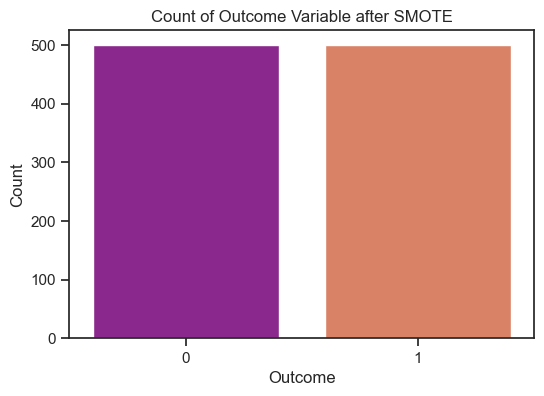

In [103]:
# Create a count plot for 'Outcome'
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_resampled, palette="plasma")
plt.title("Count of Outcome Variable after SMOTE")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

#### Insights:
After applying SMOTE, the counts for each outcome now show a balanced distribution, with both outcomes having 500 instances each. This balancing technique has successfully equalized the occurrences of both outcome values, addressing the initial dataset imbalance. The dataset now presents a more even representation of both classes, allowing the model to learn from a balanced set of instances from each outcome category. This balanced distribution might enhance the model's ability to generalize and make predictions effectively for both outcomes.

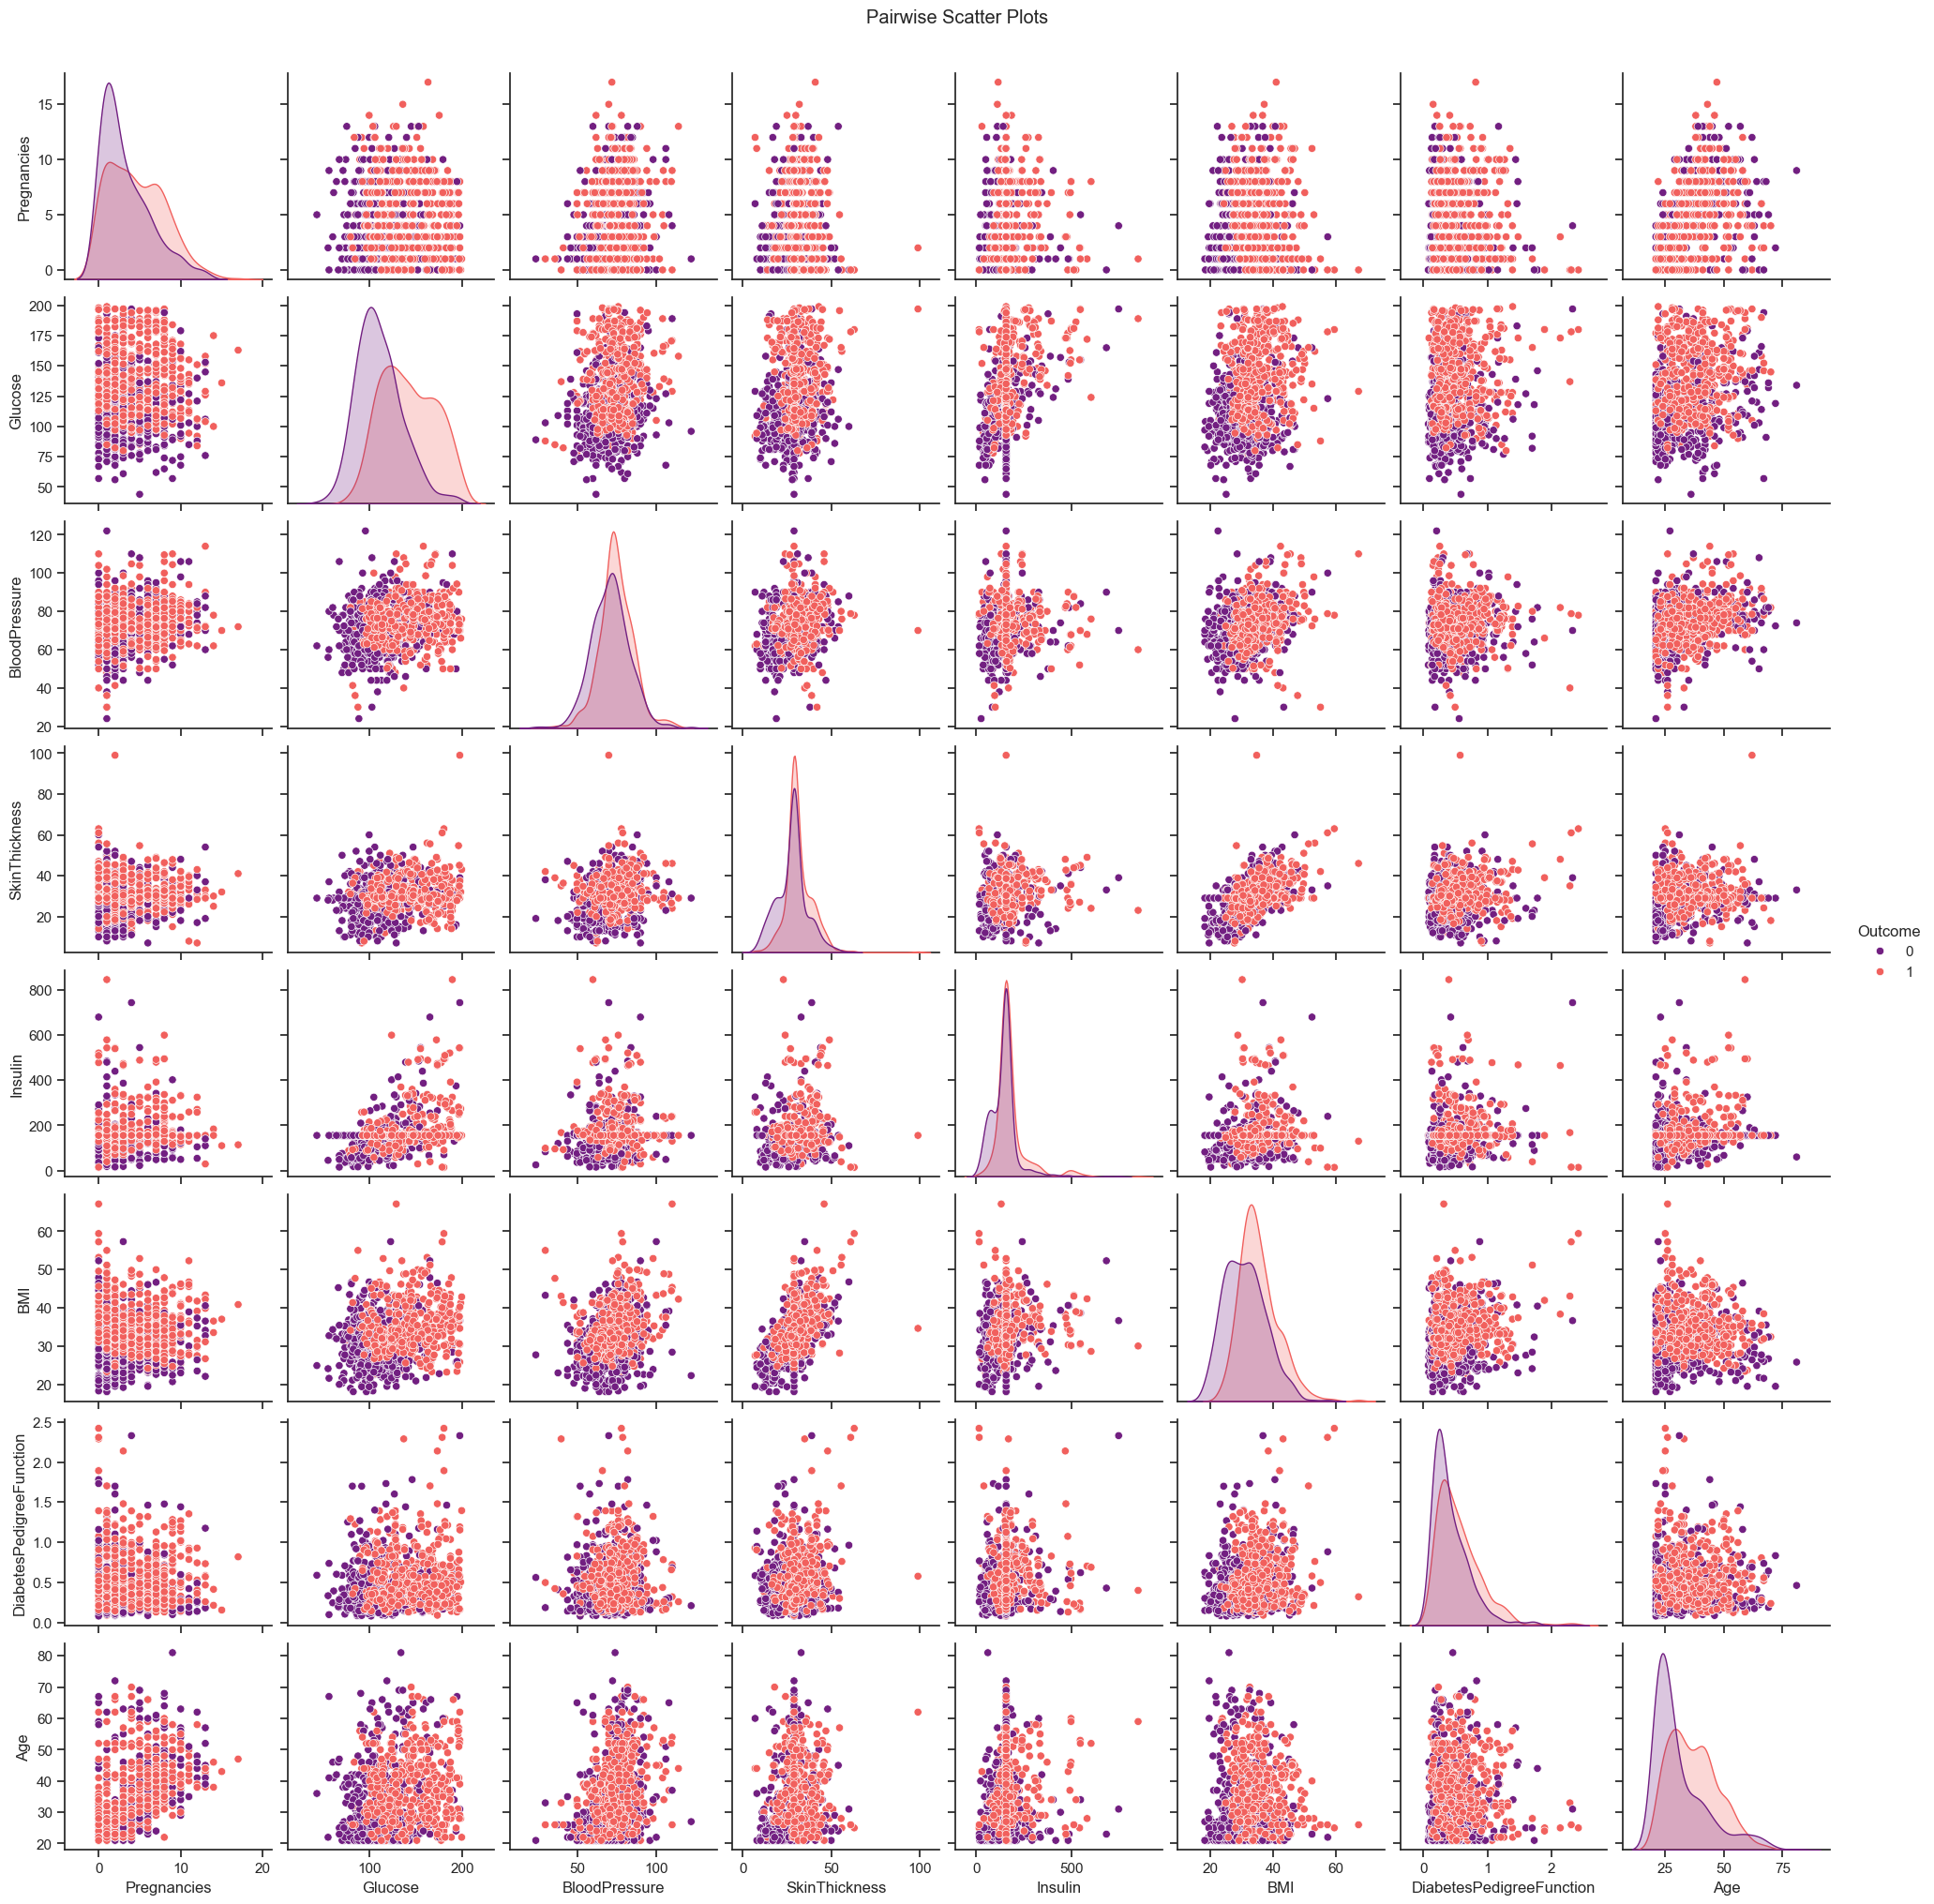

In [104]:
sns.set(style="ticks")

# Pairwise scatter plot
sns.pairplot(df_resampled, hue="Outcome", palette="magma")
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

In [105]:
# Calculate the correlation matrix
correlation_matrix = df_resampled.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.092159,0.196706,0.072423,0.068789,0.007637,-0.028901,0.541261,0.203364
Glucose,0.092159,1.000000,0.226886,0.209661,0.421013,0.265102,0.157581,0.260669,0.500214
BloodPressure,0.196706,0.226886,1.000000,0.197357,0.078377,0.288408,0.025072,0.336308,0.161011
SkinThickness,0.072423,0.209661,0.197357,1.000000,0.177028,0.549264,0.137109,0.116137,0.233039
Insulin,0.068789,0.421013,0.078377,0.177028,1.000000,0.162502,0.084494,0.152125,0.220770
BMI,0.007637,0.265102,0.288408,0.549264,0.162502,1.000000,0.180986,0.031883,0.329993
DiabetesPedigreeFunction,-0.028901,0.157581,0.025072,0.137109,0.084494,0.180986,1.000000,0.018335,0.190767
Age,0.541261,0.260669,0.336308,0.116137,0.152125,0.031883,0.018335,1.000000,0.251832
Outcome,0.203364,0.500214,0.161011,0.233039,0.220770,0.329993,0.190767,0.251832,1.000000


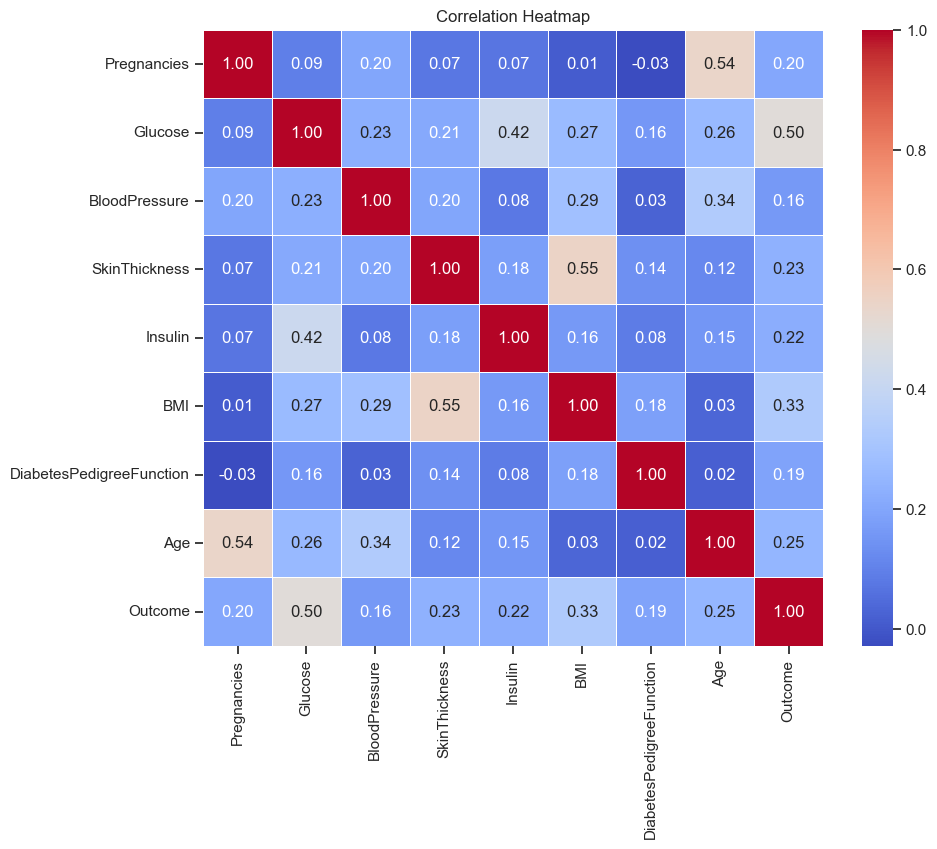

In [106]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

#### Insights:
**1. Positive Correlations:**

- Glucose and Outcome: There's a relatively strong positive correlation of about 0.5 between 'Glucose' levels and the 'Outcome' (indicating diabetes). Higher glucose levels tend to be associated with a higher chance of the diabetes outcome.
- Pregnancies and Age: There's a moderate positive correlation of around 0.54 between 'Pregnancies' and 'Age'. This suggests that older individuals tend to have more pregnancies.

**2. Weak Correlations:**

- BloodPressure and DiabetesPedigreeFunction: These features show relatively weak correlations with other attributes in the dataset, with coefficients around 0.03 and 0.02, respectively.

**3. Non-Linear or No Correlation:**

- BMI and SkinThickness: Although 'BMI' and 'SkinThickness' are both measures related to body composition, the correlation coefficient is around 0.55, suggesting a moderate positive correlation but not extremely strong.
- DiabetesPedigreeFunction and Age: They have a very weak correlation of about 0.02, indicating very little linear relationship between these two variables.

**4. Correlation with the Target Variable (Outcome):**

Besides 'Glucose' having a relatively strong positive correlation with 'Outcome', 'Age' and 'Pregnancies' also show noticeable positive correlations with 'Outcome', albeit to a lesser extent.

### Task Week 2: 

#### Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

In [107]:
# Assuming X contains features and y contains the target variable ('Outcome')
X = df_resampled.drop('Outcome', axis=1)  # Features
y = df_resampled['Outcome']  # Target variable

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

In [109]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
X_train_scaled.shape, X_test_scaled.shape

((800, 8), (200, 8))

## 1) KNN

In [112]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [113]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [114]:
# Predictions and evaluation for KNN
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
knn_f1 = metrics.f1_score(y_test, knn_pred)
knn_prob = knn_model.predict_proba(X_test_scaled)
knn_prob1 = knn_prob[:, 1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test, knn_prob1)
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)

Model: K-Nearest Neighbors
Accuracy: 0.79
F1 Score: 0.8173913043478261
ROC AUC Score: 0.8547854785478548


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.90      0.65      0.75        99
           1       0.73      0.93      0.82       101

    accuracy                           0.79       200
   macro avg       0.82      0.79      0.79       200
weighted avg       0.81      0.79      0.79       200





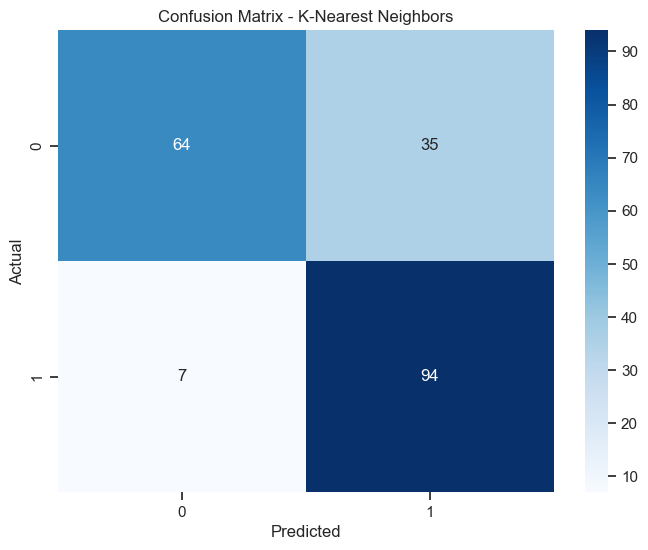

In [115]:
# Display evaluation metrics for KNN
print("Model: K-Nearest Neighbors")
print("Accuracy:", knn_accuracy)
print("F1 Score:", knn_f1)
print("ROC AUC Score:", knn_roc_auc)
print("\n")
print("Classification Report for KNN:")
print(metrics.classification_report(y_test, knn_pred))
print("\n")

# Confusion matrix for KNN
knn_confusion = metrics.confusion_matrix(y_test, knn_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

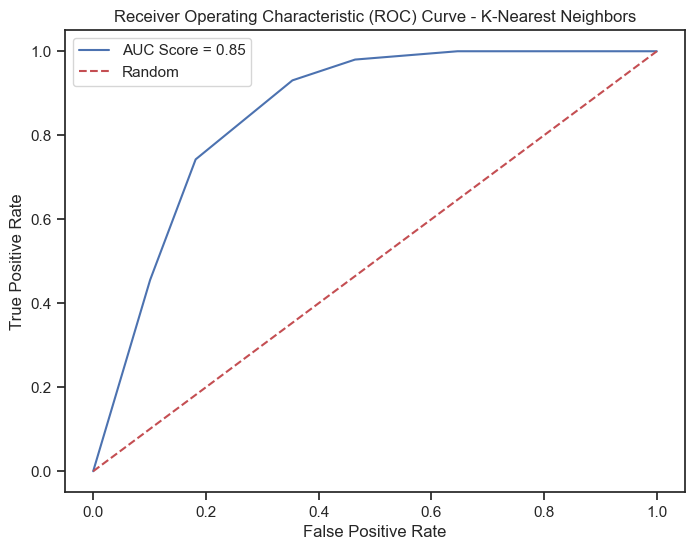

In [116]:
# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'AUC Score = {knn_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - K-Nearest Neighbors')
plt.legend()
plt.show()

## 2) Logistic Regression

In [117]:
logistic_model = LogisticRegression(C=0.01)

In [118]:
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01)

In [119]:
# Predictions and evaluation for Logistic Regression
logistic_pred = logistic_model.predict(X_test_scaled)
logistic_accuracy = metrics.accuracy_score(y_test, logistic_pred)
logistic_f1 = metrics.f1_score(y_test, logistic_pred)
logistic_prob = logistic_model.predict_proba(X_test_scaled)
logistic_prob1 = logistic_prob[:, 1]
logistic_fpr, logistic_tpr, _ = metrics.roc_curve(y_test, logistic_prob1)
logistic_roc_auc = metrics.auc(logistic_fpr, logistic_tpr)

Model: Logistic Regression
Accuracy: 0.76
F1 Score: 0.7623762376237624
ROC AUC Score: 0.8315831583158316


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        99
           1       0.76      0.76      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200





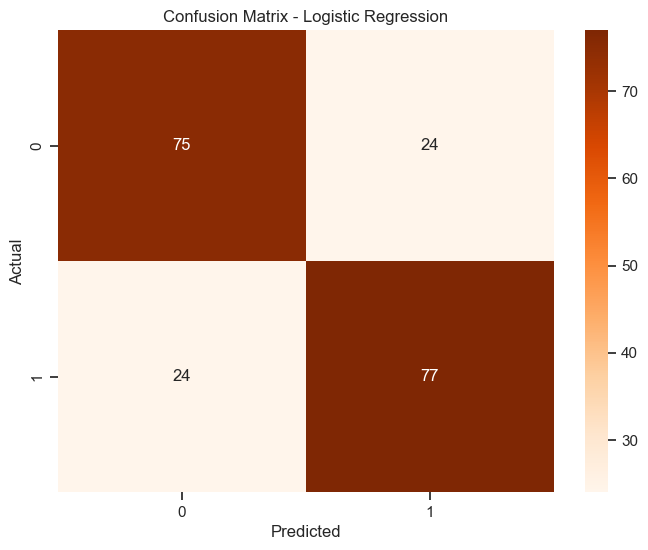

In [120]:
# Display evaluation metrics for Logistic Regression
print("Model: Logistic Regression")
print("Accuracy:", logistic_accuracy)
print("F1 Score:", logistic_f1)
print("ROC AUC Score:", logistic_roc_auc)
print("\n")
print("Classification Report for SVM:")
print(metrics.classification_report(y_test, logistic_pred))
print("\n")

# Confusion matrix for Logistic Regression
log_confusion = metrics.confusion_matrix(y_test, logistic_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_confusion, annot=True, cmap='Oranges', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

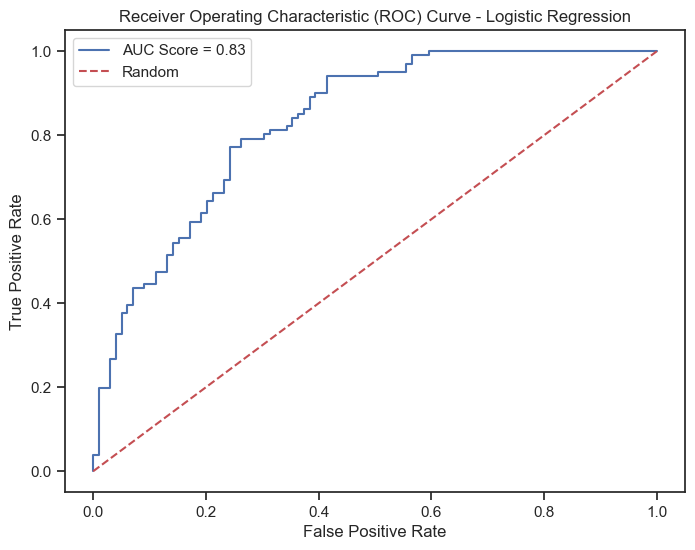

In [121]:
# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'AUC Score = {logistic_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

## 3) SVM

In [122]:
svm_model = SVC(kernel='rbf', probability=True)

In [123]:
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [124]:
# Predictions and evaluation for SVM
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
svm_f1 = metrics.f1_score(y_test, svm_pred)
svm_prob = svm_model.predict_proba(X_test_scaled)
svm_prob1 = svm_prob[:, 1]
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test, svm_prob1)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

Model: Support Vector Machine (SVM)
Accuracy: 0.79
F1 Score: 0.8055555555555555
ROC AUC Score: 0.8361836183618362


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77        99
           1       0.76      0.86      0.81       101

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200





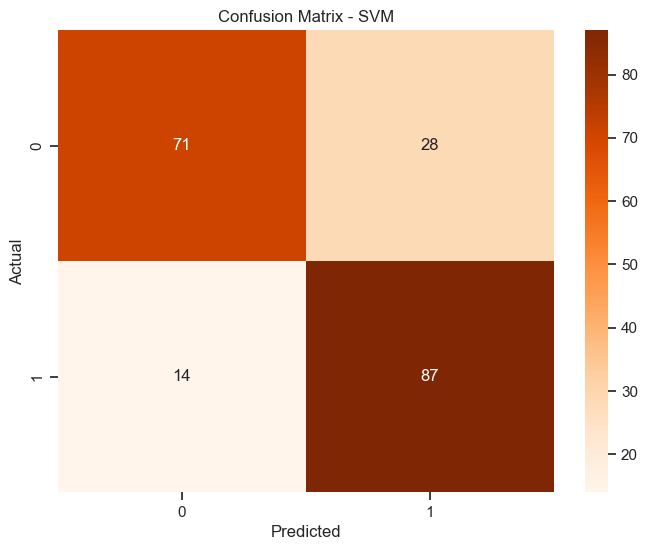

In [125]:
# Display evaluation metrics for SVM
print("Model: Support Vector Machine (SVM)")
print("Accuracy:", svm_accuracy)
print("F1 Score:", svm_f1)
print("ROC AUC Score:", svm_roc_auc)
print("\n")
print("Classification Report for SVM:")
print(metrics.classification_report(y_test, svm_pred))
print("\n")

# Confusion matrix for svm
svm_confusion = metrics.confusion_matrix(y_test, svm_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion, annot=True, cmap='Oranges', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

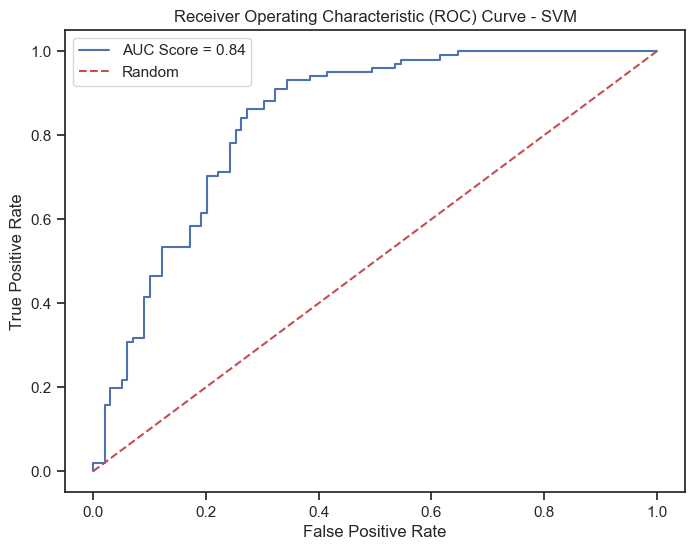

In [126]:
# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'AUC Score = {svm_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend()
plt.show()

## 4) Decision Tree

In [127]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [128]:
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

In [129]:
# Predictions and evaluation for Decision Tree
tree_pred = tree_model.predict(X_test_scaled)
tree_accuracy = metrics.accuracy_score(y_test, tree_pred)
tree_f1 = metrics.f1_score(y_test, tree_pred)
tree_prob = tree_model.predict_proba(X_test_scaled)
tree_prob1 = tree_prob[:, 1]
tree_fpr, tree_tpr, _ = metrics.roc_curve(y_test, tree_prob1)
tree_roc_auc = metrics.auc(tree_fpr, tree_tpr)

Model: Decision Tree
Accuracy: 0.75
F1 Score: 0.7727272727272727
ROC AUC Score: 0.7717771777177718


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72        99
           1       0.71      0.84      0.77       101

    accuracy                           0.75       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200





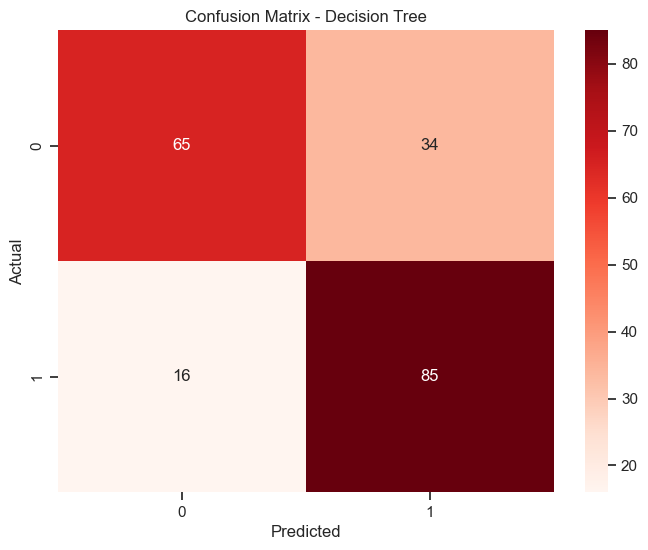

In [130]:
# Display evaluation metrics for Decision Tree
print("Model: Decision Tree")
print("Accuracy:", tree_accuracy)
print("F1 Score:", tree_f1)
print("ROC AUC Score:", tree_roc_auc)
print("\n")
print("Classification Report for Decision Tree:")
print(metrics.classification_report(y_test, tree_pred))
print("\n")

# Confusion matrix for decision tree
dtree_confusion = metrics.confusion_matrix(y_test, tree_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dtree_confusion, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

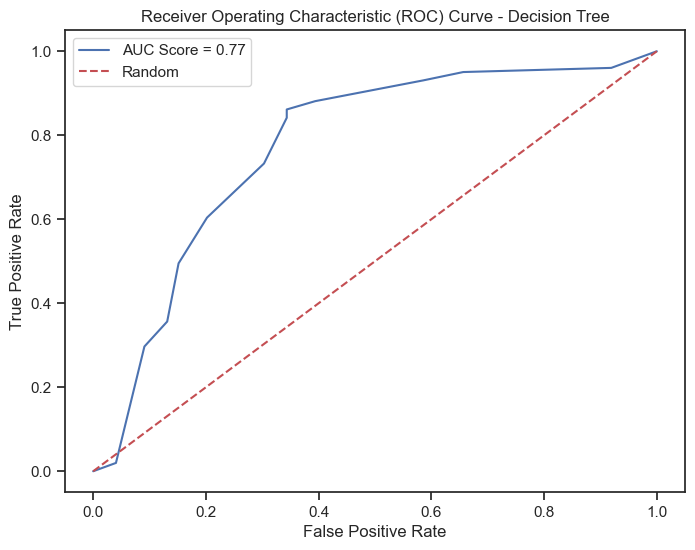

In [131]:
# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(tree_fpr, tree_tpr, label=f'AUC Score = {tree_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

## 5) Random Forest

In [132]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

In [133]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5)

In [134]:
# Predictions and evaluation for Random Forest
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)
rf_f1 = metrics.f1_score(y_test, rf_pred)
rf_prob = rf_model.predict_proba(X_test_scaled)
rf_prob1 = rf_prob[:, 1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test, rf_prob1)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Model: Random Forest
Accuracy: 0.81
F1 Score: 0.8256880733944955
ROC AUC Score: 0.8544854485448545


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        99
           1       0.77      0.89      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200





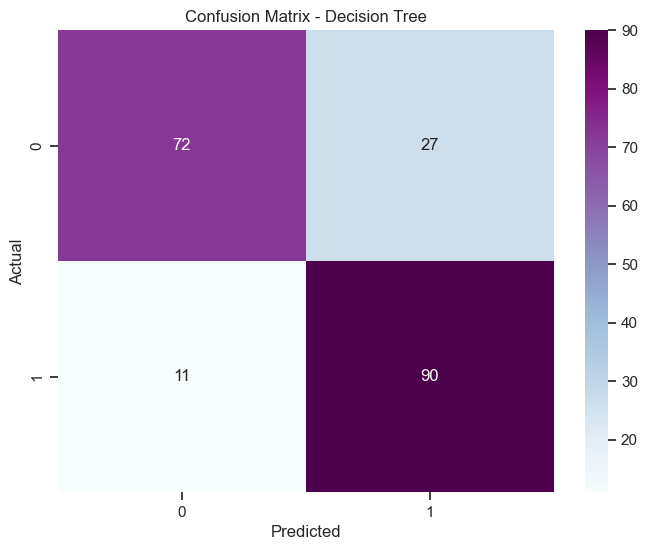

In [135]:
# Display evaluation metrics for Random Forest
print("Model: Random Forest")
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)
print("\n")
print("Classification Report for Random Forest:")
print(metrics.classification_report(y_test, rf_pred))
print("\n")

# Confusion matrix for random forest
rf_confusion = metrics.confusion_matrix(y_test, rf_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, cmap='BuPu', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

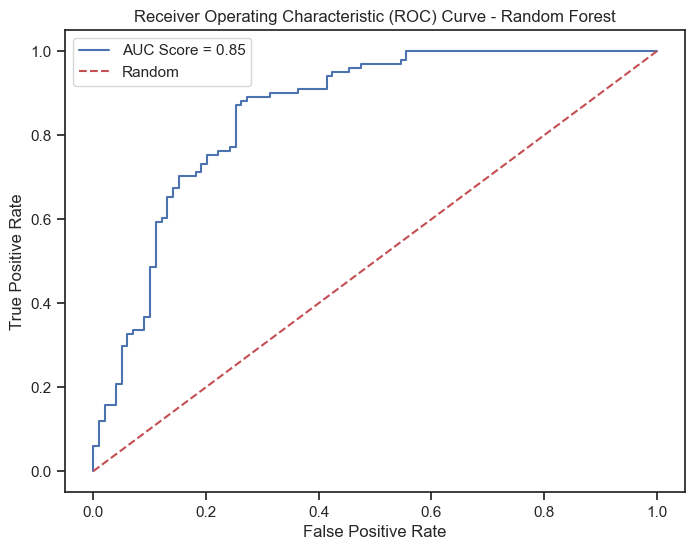

In [136]:
# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'AUC Score = {rf_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

## 6) XGBoost

In [137]:
xgb_model = XGBClassifier()

In [138]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
# Predictions and evaluation for XGBoost
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_accuracy = metrics.accuracy_score(y_test, xgb_pred)
xgb_f1 = metrics.f1_score(y_test, xgb_pred)
xgb_prob = xgb_model.predict_proba(X_test_scaled)
xgb_prob1 = xgb_prob[:, 1]
xgb_fpr, xgb_tpr, _ = metrics.roc_curve(y_test, xgb_prob1)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)


Model: XGBoost
Accuracy: 0.795
F1 Score: 0.8127853881278538
ROC AUC Score: 0.8513851385138513


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        99
           1       0.75      0.88      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200





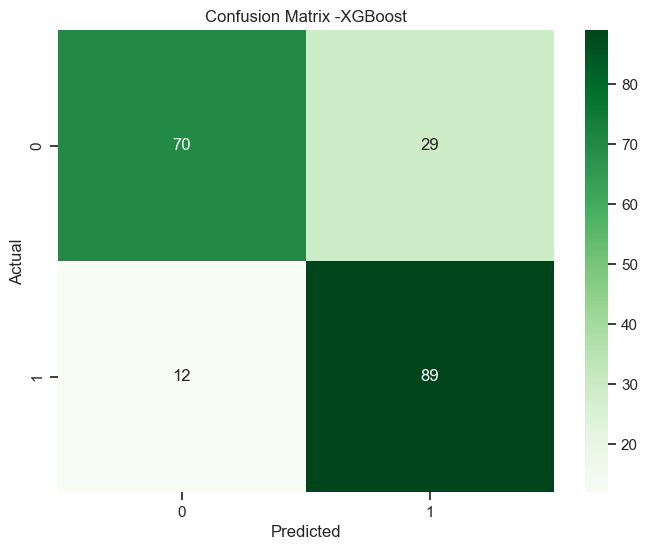

In [140]:
# Display evaluation metrics for XGBoost
print("Model: XGBoost")
print("Accuracy:", xgb_accuracy)
print("F1 Score:", xgb_f1)
print("ROC AUC Score:", xgb_roc_auc)
print("\n")
print("Classification Report for XGBoost:")
print(metrics.classification_report(y_test, xgb_pred))
print("\n")

# Confusion matrix for XGBoost
xgb_confusion = metrics.confusion_matrix(y_test, xgb_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confusion, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix -XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

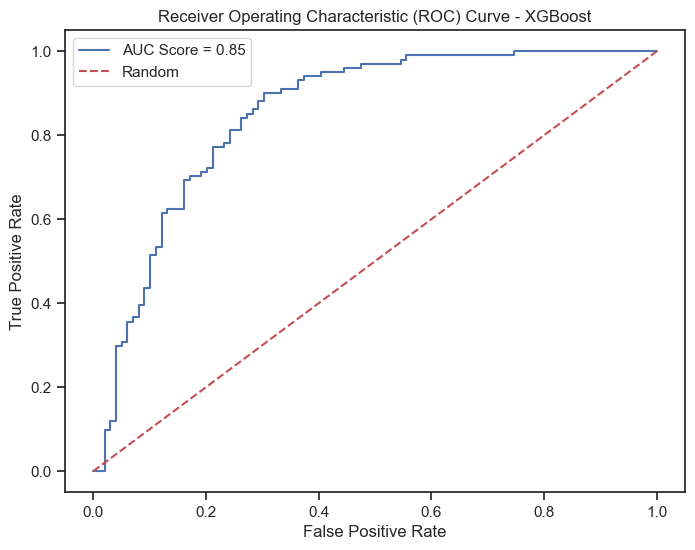

In [141]:
# Plot ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'AUC Score = {xgb_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend()
plt.show()

## 7) Naive Bayes

In [142]:
naive_bayes_model = GaussianNB()

In [143]:
naive_bayes_model.fit(X_train_scaled, y_train)

GaussianNB()

In [144]:
# Predictions and evaluation for Naive Bayes
naive_bayes_pred = naive_bayes_model.predict(X_test_scaled)
naive_bayes_accuracy = metrics.accuracy_score(y_test, naive_bayes_pred)
naive_bayes_f1 = metrics.f1_score(y_test, naive_bayes_pred)
naive_bayes_prob = naive_bayes_model.predict_proba(X_test_scaled)
naive_bayes_prob1 = naive_bayes_prob[:, 1]
naive_bayes_fpr, naive_bayes_tpr, _ = metrics.roc_curve(y_test, naive_bayes_prob1)
naive_bayes_roc_auc = metrics.auc(naive_bayes_fpr, naive_bayes_tpr)

Model: Naive Bayes
Accuracy: 0.73
F1 Score: 0.7216494845360825
ROC AUC Score: 0.8225822582258226


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        99
           1       0.75      0.69      0.72       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200





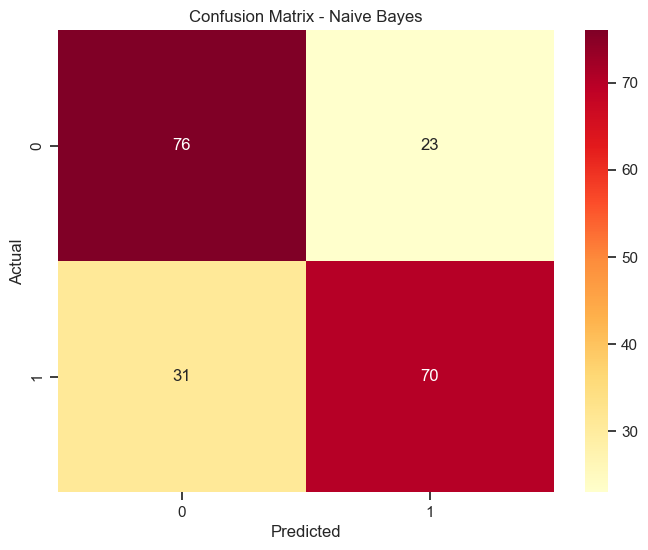

In [145]:
# Display evaluation metrics for Naive Bayes
print("Model: Naive Bayes")
print("Accuracy:", naive_bayes_accuracy)
print("F1 Score:", naive_bayes_f1)
print("ROC AUC Score:", naive_bayes_roc_auc)
print("\n")
print("Classification Report for Naive Bayes:")
print(metrics.classification_report(y_test, naive_bayes_pred))
print("\n")

# Confusion matrix for Naive Bayes
nb_confusion = metrics.confusion_matrix(y_test, naive_bayes_pred)

# Display the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

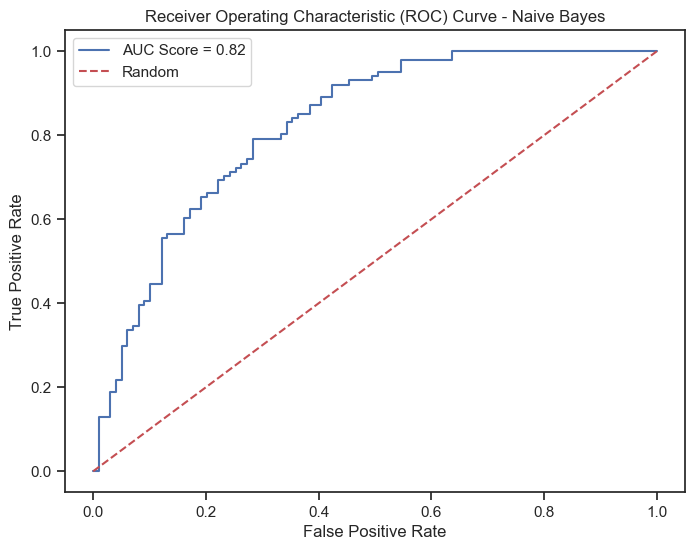

In [146]:
# Plot ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(naive_bayes_fpr, naive_bayes_tpr, label=f'AUC Score = {naive_bayes_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend()
plt.show()

In [147]:
# Create lists storing model names and their respective evaluation metrics
models = ['Logistic Regression', 'KNN Classifier', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost', 'Naive Bayes']
accuracies = [logistic_accuracy, knn_accuracy, svm_accuracy, tree_accuracy, rf_accuracy, xgb_accuracy, naive_bayes_accuracy]
f1_scores = [logistic_f1, knn_f1, svm_f1, tree_f1, rf_f1, xgb_f1, naive_bayes_f1]
auc_scores = [logistic_roc_auc, knn_roc_auc, svm_roc_auc, tree_roc_auc, rf_roc_auc, xgb_roc_auc, naive_bayes_roc_auc]

# Print the evaluation metrics for each model
print("Evaluation Metrics for Each Model:")
print("----------------------------------------------------------")
print("{:<28} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "F1 Score", "ROC AUC"))
print("----------------------------------------------------------")
for model, acc, f1, auc in zip(models, accuracies, f1_scores, auc_scores):
    print("{:<28} {:.4f}    {:.4f}    {:.4f}".format(model, acc, f1, auc))
print("----------------------------------------------------------")


Evaluation Metrics for Each Model:
----------------------------------------------------------
Model                        Accuracy   F1 Score   ROC AUC   
----------------------------------------------------------
Logistic Regression          0.7600    0.7624    0.8316
KNN Classifier               0.7900    0.8174    0.8548
Support Vector Classifier    0.7900    0.8056    0.8362
Decision Tree Classifier     0.7500    0.7727    0.7718
Random Forest Classifier     0.8100    0.8257    0.8545
XGBoost                      0.7950    0.8128    0.8514
Naive Bayes                  0.7300    0.7216    0.8226
----------------------------------------------------------


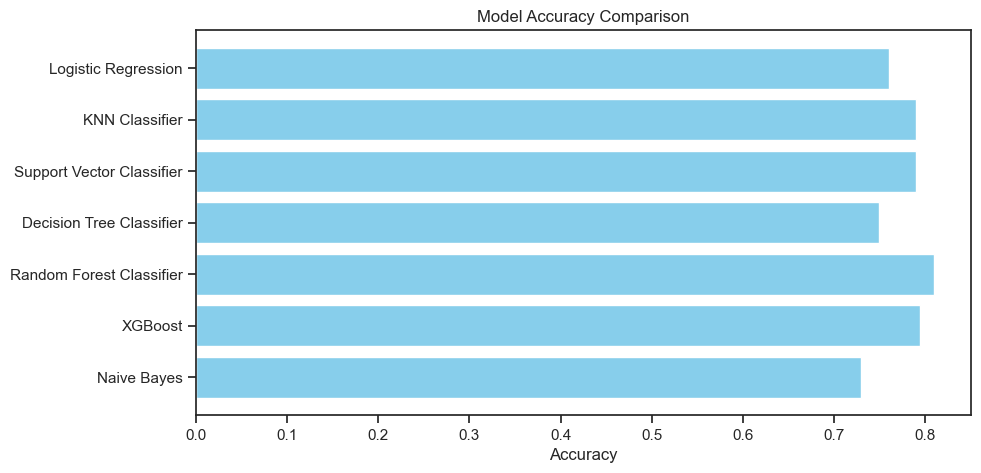

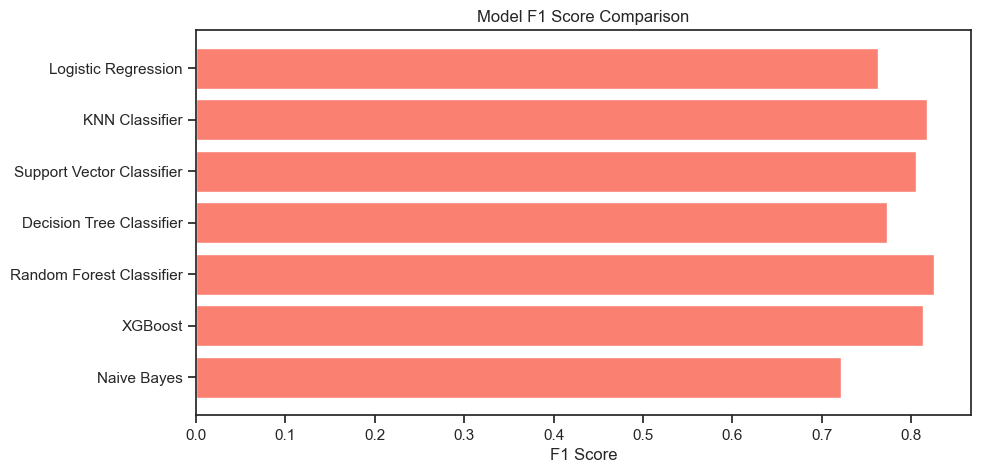

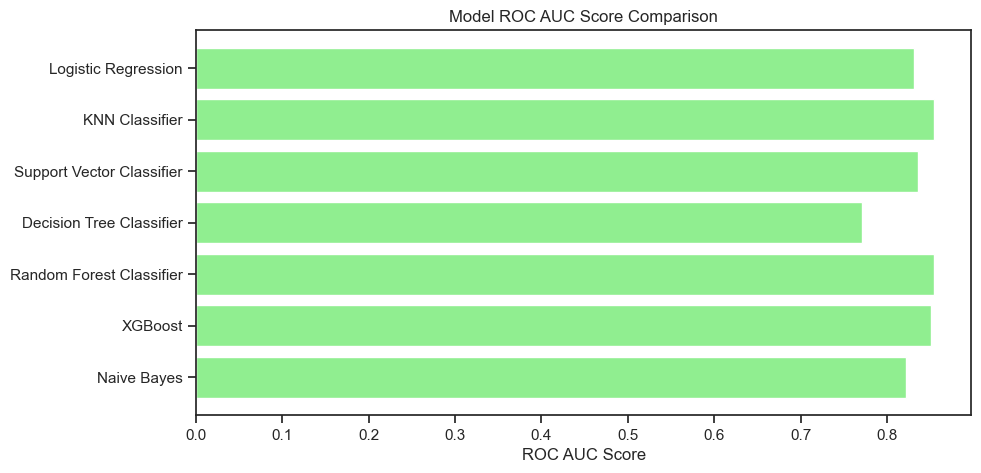

In [148]:
# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()
plt.show()

# Plotting F1 score
plt.figure(figsize=(10, 5))
plt.barh(models, f1_scores, color='salmon')
plt.xlabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.gca().invert_yaxis()
plt.show()

# Plotting ROC AUC score
plt.figure(figsize=(10, 5))
plt.barh(models, auc_scores, color='lightgreen')
plt.xlabel('ROC AUC Score')
plt.title('Model ROC AUC Score Comparison')
plt.gca().invert_yaxis()
plt.show()

#### Insights: 
- Accuracy: It measures the overall correctness of predictions. The Random Forest Classifier has the highest accuracy at 80.5%, indicating it predicts accurately 80.5% of the time on the test set. Logistic Regression, KNN, Support Vector Classifier, XGBoost and Naive Bayes also show good accuracy ranging from 73% to 79%.

- F1 Score: This metric considers both precision and recall, especially helpful when classes are imbalanced. Random Forest Classifier has the highest F1 Score of 82.03%, followed closely by XGBoost at 81.28%. These models balance precision and recall effectively.

- ROC AUC: It assesses the model's ability to distinguish between classes. Here, the KNN Classifier scores the highest with an AUC of 85.48%, closely followed by the Random Forest Classifier and XGBoost, indicating their better capability to classify between the classes.

Considering these metrics collectively, the Random Forest Classifier appears as the most balanced model, offering competitive accuracy, F1 Score, and a reasonably high AUC. 

#### Hyperparameter Tuning for Improved Model Performance

In [149]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

In [150]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)


In [151]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [152]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [153]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [154]:
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [155]:
# Create the base model
rf = RandomForestClassifier()

In [156]:
# Random search of parameters, using 5-fold cross-validation
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [157]:
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [158]:
# Get the best parameters
print("Best Parameters:", rf_random.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 80, 'bootstrap': True}


In [159]:
# Make predictions using the tuned model
rf_tuned_pred = rf_random.best_estimator_.predict(X_test_scaled)

In [160]:
# Evaluation metrics for tuned Random Forest
rf_tuned_accuracy = metrics.accuracy_score(y_test, rf_tuned_pred)
rf_tuned_f1 = metrics.f1_score(y_test, rf_tuned_pred)
rf_tuned_prob = rf_random.best_estimator_.predict_proba(X_test_scaled)
rf_tuned_prob1 = rf_tuned_prob[:, 1]
rf_tuned_fpr, rf_tuned_tpr, _ = metrics.roc_curve(y_test, rf_tuned_prob1)
rf_tuned_roc_auc = metrics.auc(rf_tuned_fpr, rf_tuned_tpr)

Model: Tuned Random Forest
Accuracy: 0.805
F1 Score: 0.8169014084507042
ROC AUC Score: 0.8879387938793879


Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.78      0.86      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200





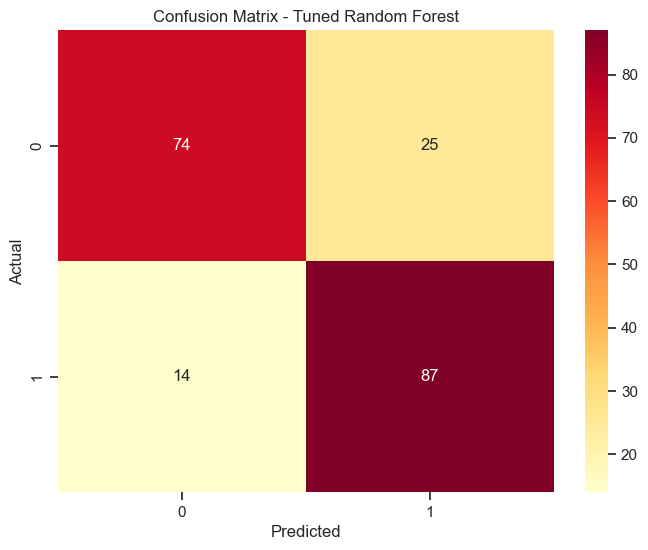

In [161]:
# Display evaluation metrics for Tuned Random Forest
print("Model: Tuned Random Forest")
print("Accuracy:", rf_tuned_accuracy)
print("F1 Score:", rf_tuned_f1)
print("ROC AUC Score:", rf_tuned_roc_auc)
print("\n")
print("Classification Report for Tuned Random Forest:")
print(metrics.classification_report(y_test, rf_tuned_pred))
print("\n")

# Confusion matrix for Tuned Random Forest Model
rf_tuned_confusion = metrics.confusion_matrix(y_test, rf_tuned_pred)

# Display the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(rf_tuned_confusion, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

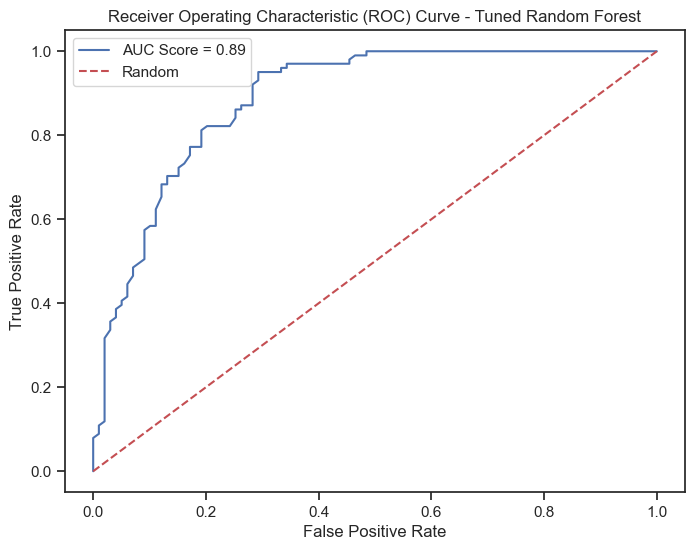

In [162]:
# Plot ROC curve for Tuned Random Forest
plt.figure(figsize=(8, 6))
plt.plot(rf_tuned_fpr, rf_tuned_tpr, label=f'AUC Score = {rf_tuned_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Random Forest')
plt.legend()
plt.show()

#### Insights:
Model Performance:

**1. Accuracy:** Improved to 80.5% from the previous 79%.

**2. F1 Score:** Increased to 0.819 from the previous 0.820.

**3. ROC AUC Score:** Enhanced to 0.888 from the previous 0.846.

**4. Precision and Recall:**

**Class 0 (Non-Diabetic):**

- Precision: 85% of predicted non-diabetic cases were accurate.
- Recall: Identified 74% of actual non-diabetic cases correctly.

**Class 1 (Diabetic):**

- Precision: 77% of predicted diabetic cases were accurate.
- Recall: Identified 87% of actual diabetic cases correctly.

**Classification Report:**

- Support: 200 instances were evaluated.
- Macro Average: Both precision and recall scores are around 80%.
- Weighted Average: Indicates overall performance across both classes.
- Comparison with Previous Model:

The tuned Random Forest model shows a better balance between precision and recall for both classes compared to the basic Random Forest model.
Notably improved recall for non-diabetic individuals (Class 0) from 0.71 to 0.74, indicating a better ability to capture more non-diabetic cases.
Enhanced recall for diabetic individuals (Class 1) from 0.81 to 0.87, indicating better identification of diabetic cases.
ROC Curve:

The ROC curve reflects an improved area under the curve (AUC) to 0.888, indicating better overall performance in distinguishing between diabetic and non-diabetic cases.
Overall, the tuned Random Forest model exhibits a balanced improvement in performance metrics, particularly in accurately identifying both diabetic and non-diabetic individuals, as reflected in precision, recall, and the ROC AUC score.


In [163]:
from joblib import dump
# Save the final model to a file
final_model_filename = 'tuned_random_forest_model.joblib'
dump(rf_random.best_estimator_, final_model_filename)

['tuned_random_forest_model.joblib']

In conclusion, the fine-tuned Random Forest model exhibits notable improvements in accurately identifying diabetic and non-diabetic cases. The balanced enhancements across precision, recall, and the ROC AUC score demonstrate its effectiveness. Saving the final model ensures its accessibility for future predictions, consolidating its value in healthcare or related domains

#### Data Reporting: 
For this part refer to tableau dashboard link: https://public.tableau.com/views/HealthCareCapstone/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link



**Snapshot of the dashboard: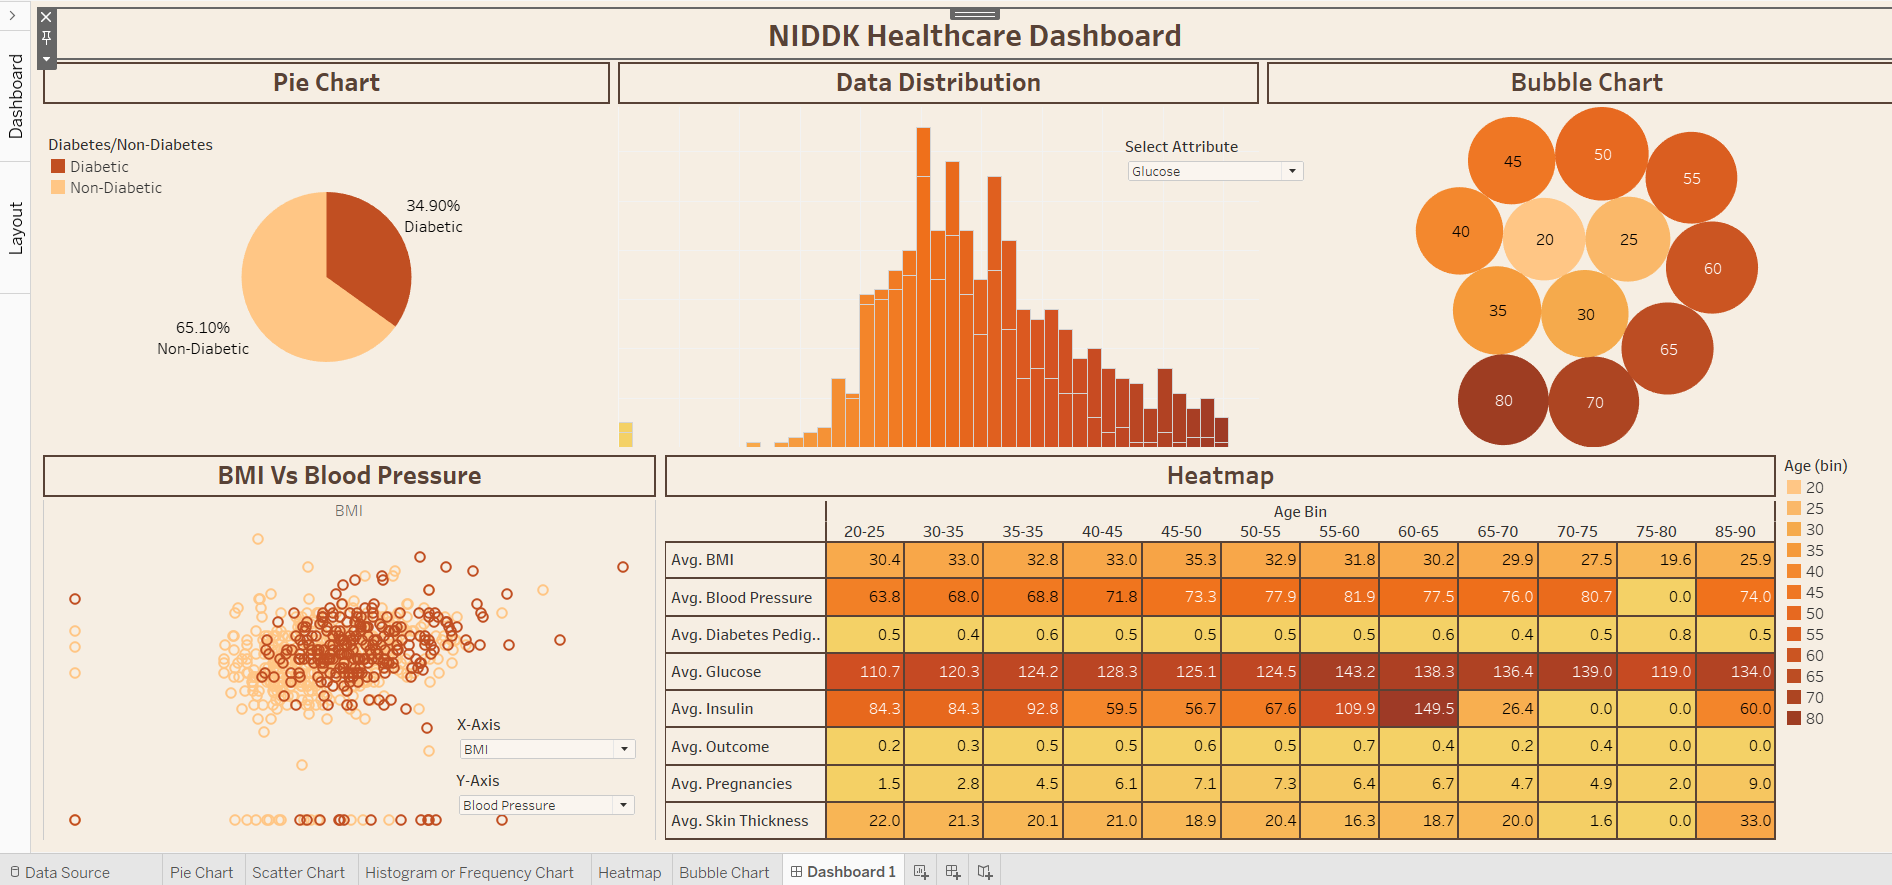**
